In [23]:
# In this notebook I'll treat the data and clustering it

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

from IPython.display import Markdown, display

from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn import cluster, datasets
from sklearn.cluster import KMeans

import random
from IPython.display import Markdown, display 

import pickle


In [2]:
films_w_awards = pd.read_csv('films_w_awards.csv')


/var/folders/0r/l856hq9x61zf5p8g8vxjs_dh0000gn/T/ipykernel_1256/2686176247.py:1: DtypeWarning: Columns (25,26,27,28,29,30,31,32,33,34,35,36,37,44,45,46,47,48,49,50,51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  films_w_awards = pd.read_csv('films_w_awards.csv')


In [3]:
# Selecting features to cluster from main dataframe

In [4]:
films_w_awards.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175481 entries, 0 to 175480
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   year_film                 175481 non-null  int64  
 1   movie_name                175481 non-null  object 
 2   runtime                   175481 non-null  int64  
 3   rating                    125864 non-null  float64
 4   votes                     175481 non-null  int64  
 5   osc_nominated_num         175481 non-null  int64  
 6   osc_won_num               175481 non-null  int64  
 7   cannes_won_num            175481 non-null  int64  
 8   director                  173391 non-null  object 
 9   actor1                    166675 non-null  object 
 10  actor2                    164134 non-null  object 
 11  actor3                    160920 non-null  object 
 12  actor4                    156091 non-null  object 
 13  genre1                    175481 non-null  o

In [5]:
films_w_awards

,year_film,movie_name,runtime,rating,votes,osc_nominated_num,osc_won_num,cannes_won_num,director,actor1,...,osc_won_category10,osc_won_category11,osc_won_category12,cannes_won_category1,cannes_won_category2,cannes_won_category3,movie_id,director_id,star_id,description
0,1894,Miss Jerry,45,5.3,204,0,0,0,Alexander Black,Blanche Bayliss,...,NaN,NaN,NaN,NaN,NaN,NaN,tt0000009,/name/nm0085156/,"/name/nm0063086/,/name/nm0183823/,/name/nm1309...",The adventures of a female reporter in the 1890s.
1,1903,The Passion Play,45,6.5,575,0,0,0,Lucien Nonguet,Madame Moreau,...,NaN,NaN,NaN,NaN,NaN,NaN,tt0127962,/name/nm0634629/,"/name/nm0954087/,/name/nm1166468/,/name/nm1166...",The story of Jesus Christ from the proclamatio...
2,1905,La malia dell'oro,0,4.0,31,0,0,0,Filoteo Alberini,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,tt0388231,/name/nm1135106/,NaN,NaN
3,1905,Untitled Execution Films,0,NaN,0,0,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,tt11365068,NaN,NaN,The Japanese entered China in 1900 as part of ...
4,1906,The Story of the Kelly Gang,70,6.0,818,0,0,0,Charles Tait,Elizabeth Tait,...,NaN,NaN,NaN,NaN,NaN,NaN,tt0000574,/name/nm0846879/,"/name/nm0846887/,/name/nm0846894/,/name/nm1431...","Story of Ned Kelly, an infamous 19th-century A..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175476,2023,Dear Jassi,0,NaN,0,0,0,0,Tarsem Singh,Gulshan Grover,...,NaN,NaN,NaN,NaN,NaN,NaN,tt26542557,/name/nm0802248/,"/name/nm0004109/,/name/nm2747851/,/name/nm1015...",Plot under wraps.
175477,2023,Ant-Man and the Wasp: Quantumania,125,6.6,5396,0,0,0,Peyton Reed,Paul Rudd,...,NaN,NaN,NaN,NaN,NaN,NaN,tt10954600,/name/nm0715636/,"/name/nm0748620/,/name/nm1431940/,/name/nm3718...","Scott Lang and Hope Van Dyne, along with Hank ..."
175478,2023,1919,0,NaN,0,0,0,0,Tomas Hoffman,Ondrej Vetchý,...,NaN,NaN,NaN,NaN,NaN,NaN,tt14446414,/name/nm1885989/,"/name/nm0895384/,/name/nm0889022/,/name/nm0389...",Adaptation of Frantisek Langer's play about co...
175479,2023,Bloody Nun,0,NaN,0,0,0,0,Will Collazo Jr.,Julie Anne Prescott,...,NaN,NaN,NaN,NaN,NaN,NaN,tt16537858,/name/nm4005028/,"/name/nm2766218/,/name/nm4908103/,/name/nm0470...",The final chapter in the Bloody Nun saga. Ther...


In [6]:
# extracting numericals
# numerical = sampled_films.select_dtypes(np.number)
numerical = films_w_awards.select_dtypes(np.number)

display(type(numerical),numerical.head(3), numerical.shape, numerical.columns)


pandas.core.frame.DataFrame

,year_film,runtime,rating,votes,osc_nominated_num,osc_won_num,cannes_won_num
0,1894,45,5.3,204,0,0,0
1,1903,45,6.5,575,0,0,0
2,1905,0,4.0,31,0,0,0


(175481, 7)

Index(['year_film', 'runtime', 'rating', 'votes', 'osc_nominated_num',
       'osc_won_num', 'cannes_won_num'],
      dtype='object')

In [7]:
# Replace all NaN values with 0
numerical.fillna(0, inplace=True)
numerical

,year_film,runtime,rating,votes,osc_nominated_num,osc_won_num,cannes_won_num
0,1894,45,5.3,204,0,0,0
1,1903,45,6.5,575,0,0,0
2,1905,0,4.0,31,0,0,0
3,1905,0,0.0,0,0,0,0
4,1906,70,6.0,818,0,0,0
...,...,...,...,...,...,...,...
175476,2023,0,0.0,0,0,0,0
175477,2023,125,6.6,5396,0,0,0
175478,2023,0,0.0,0,0,0,0
175479,2023,0,0.0,0,0,0,0


In [8]:
# extracting categoricals
all_categorical = films_w_awards.select_dtypes(np.object)

display(type(all_categorical),all_categorical.head(3), all_categorical.shape, all_categorical.columns)


/var/folders/0r/l856hq9x61zf5p8g8vxjs_dh0000gn/T/ipykernel_1256/744527082.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  all_categorical = films_w_awards.select_dtypes(np.object)


pandas.core.frame.DataFrame

,movie_name,director,actor1,actor2,actor3,actor4,genre1,genre2,genre3,osc_nominated_category1,...,osc_won_category10,osc_won_category11,osc_won_category12,cannes_won_category1,cannes_won_category2,cannes_won_category3,movie_id,director_id,star_id,description
0,Miss Jerry,Alexander Black,Blanche Bayliss,William Courtenay,Chauncey Depew,NaN,Romance,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,tt0000009,/name/nm0085156/,"/name/nm0063086/,/name/nm0183823/,/name/nm1309...",The adventures of a female reporter in the 1890s.
1,The Passion Play,Lucien Nonguet,Madame Moreau,Monsieur Moreau,NaN,NaN,Biography,Drama,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,tt0127962,/name/nm0634629/,"/name/nm0954087/,/name/nm1166468/,/name/nm1166...",The story of Jesus Christ from the proclamatio...
2,La malia dell'oro,Filoteo Alberini,NaN,NaN,NaN,NaN,Fantasy,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,tt0388231,/name/nm1135106/,NaN,NaN


(175481, 50)

Index(['movie_name', 'director', 'actor1', 'actor2', 'actor3', 'actor4',
       'genre1', 'genre2', 'genre3', 'osc_nominated_category1',
       'osc_nominated_category2', 'osc_nominated_category3',
       'osc_nominated_category4', 'osc_nominated_category5',
       'osc_nominated_category6', 'osc_nominated_category7',
       'osc_nominated_category8', 'osc_nominated_category9',
       'osc_nominated_category10', 'osc_nominated_category11',
       'osc_nominated_category12', 'osc_nominated_category13',
       'osc_nominated_category14', 'osc_nominated_category15',
       'osc_nominated_category16', 'osc_nominated_category17',
       'osc_nominated_category18', 'osc_nominated_category19',
       'osc_nominated_category20', 'osc_nominated_category21',
       'osc_nominated_category22', 'osc_won_category1', 'osc_won_category2',
       'osc_won_category3', 'osc_won_category4', 'osc_won_category5',
       'osc_won_category6', 'osc_won_category7', 'osc_won_category8',
       'osc_won_category

In [9]:
# I choose the ones I'll use for clustering

categorical = all_categorical[['genre1', 'genre2', 'genre3']]

display(type(categorical),categorical.head(3), categorical.shape, categorical.columns)


pandas.core.frame.DataFrame

,genre1,genre2,genre3
0,Romance,NaN,NaN
1,Biography,Drama,NaN
2,Fantasy,NaN,NaN


(175481, 3)

Index(['genre1', 'genre2', 'genre3'], dtype='object')

In [11]:
#Clustering features with K-Means

In [10]:
# Scale numerical

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(numerical)
numerical_scaled = scaler.transform(numerical)

#Checking tranformation
pd.DataFrame(numerical_scaled,columns=numerical.columns).head()


,year_film,runtime,rating,votes,osc_nominated_num,osc_won_num,cannes_won_num
0,-3.641831,-0.722171,0.379318,-0.112395,-0.094837,-0.052176,-0.016895
1,-3.311843,-0.722171,0.796993,-0.103404,-0.094837,-0.052176,-0.016895
2,-3.238512,-1.737880,-0.073164,-0.116588,-0.094837,-0.052176,-0.016895
3,-3.238512,-1.737880,-1.465414,-0.117339,-0.094837,-0.052176,-0.016895
4,-3.201847,-0.157889,0.622962,-0.097515,-0.094837,-0.052176,-0.016895


In [11]:
with open('scaler_model.pkl', 'wb') as file:
    pickle.dump(scaler, file)


In [12]:
numerical_scaled.shape

(175481, 7)

In [13]:
# OneHotEncode Categoricals
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
categorical_encoded = enc.fit_transform(categorical).toarray()
categorical_encoded


array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [14]:
with open('encoder_model.pkl', 'wb') as file:
    pickle.dump(enc, file)


In [15]:
categorical_encoded.shape

(175481, 78)

In [16]:
X = pd.concat([pd.DataFrame(numerical_scaled), pd.DataFrame(categorical_encoded)], axis=1)
X

,0,1,2,3,4,5,6,0,1,2,...,68,69,70,71,72,73,74,75,76,77
0,-3.641831,-0.722171,0.379318,-0.112395,-0.094837,-0.052176,-0.016895,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-3.311843,-0.722171,0.796993,-0.103404,-0.094837,-0.052176,-0.016895,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-3.238512,-1.737880,-0.073164,-0.116588,-0.094837,-0.052176,-0.016895,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-3.238512,-1.737880,-1.465414,-0.117339,-0.094837,-0.052176,-0.016895,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-3.201847,-0.157889,0.622962,-0.097515,-0.094837,-0.052176,-0.016895,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175476,1.087995,-1.737880,-1.465414,-0.117339,-0.094837,-0.052176,-0.016895,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
175477,1.087995,1.083533,0.831799,0.013434,-0.094837,-0.052176,-0.016895,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
175478,1.087995,-1.737880,-1.465414,-0.117339,-0.094837,-0.052176,-0.016895,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
175479,1.087995,-1.737880,-1.465414,-0.117339,-0.094837,-0.052176,-0.016895,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [17]:
# Create DataFrame for numerical_scaled and categorical_encoded separately
numerical_df = pd.DataFrame(numerical_scaled)
categorical_df = pd.DataFrame(categorical_encoded)

# Assign the same index to both numerical and categorical DataFrames
numerical_df.index = categorical_df.index

# Concatenate numerical and categorical DataFrames along axis 1
X = pd.concat([numerical_df, categorical_df], axis=1)
X.shape

(175481, 85)

In [18]:
X

,0,1,2,3,4,5,6,0,1,2,...,68,69,70,71,72,73,74,75,76,77
0,-3.641831,-0.722171,0.379318,-0.112395,-0.094837,-0.052176,-0.016895,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-3.311843,-0.722171,0.796993,-0.103404,-0.094837,-0.052176,-0.016895,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-3.238512,-1.737880,-0.073164,-0.116588,-0.094837,-0.052176,-0.016895,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-3.238512,-1.737880,-1.465414,-0.117339,-0.094837,-0.052176,-0.016895,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-3.201847,-0.157889,0.622962,-0.097515,-0.094837,-0.052176,-0.016895,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175476,1.087995,-1.737880,-1.465414,-0.117339,-0.094837,-0.052176,-0.016895,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
175477,1.087995,1.083533,0.831799,0.013434,-0.094837,-0.052176,-0.016895,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
175478,1.087995,-1.737880,-1.465414,-0.117339,-0.094837,-0.052176,-0.016895,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
175479,1.087995,-1.737880,-1.465414,-0.117339,-0.094837,-0.052176,-0.016895,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [19]:
#I'm going to set a ramdon sample to work with clusters

# Use the 'sample' function to randomly sample 50% of the rows
X_sampled = X.sample(frac=0.5, random_state=42)  # Setting random_state for reproducibility

# 'X_sampled' now contains 50% of the rows from 'all_films'
X_sampled.shape

(87740, 85)

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

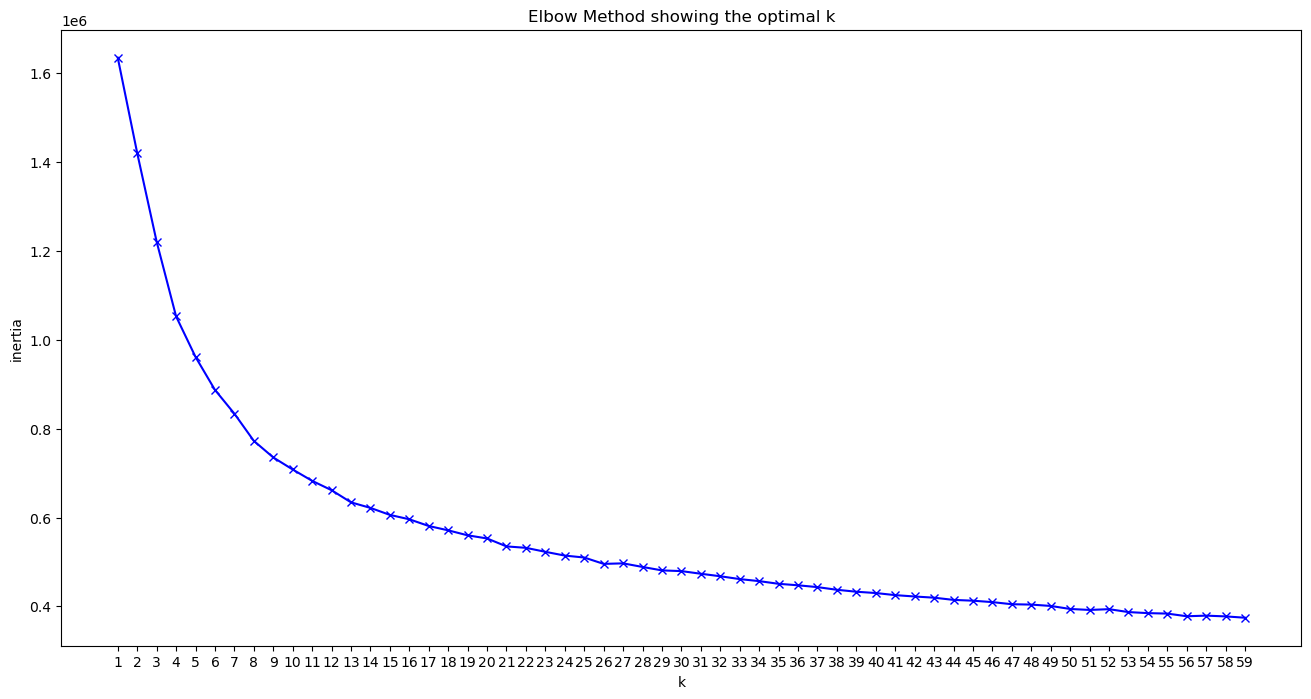

In [46]:
# Set a exploratory range (30-60)

K = range(1, 60)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')


Text(0.5, 1.0, 'Slhouette score showing the optimal k')

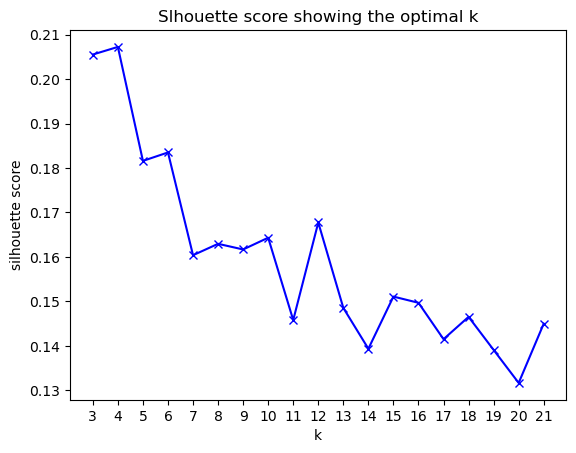

In [47]:
# Silhouette score with the optimal k values
from sklearn.metrics import silhouette_score
K = range(3, 22)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=1234)
    kmeans.fit(X)
    silhouette.append(silhouette_score(X, kmeans.predict(X)))

plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Slhouette score showing the optimal k')

Text(0.5, 1.0, 'Slhouette score showing the optimal k')

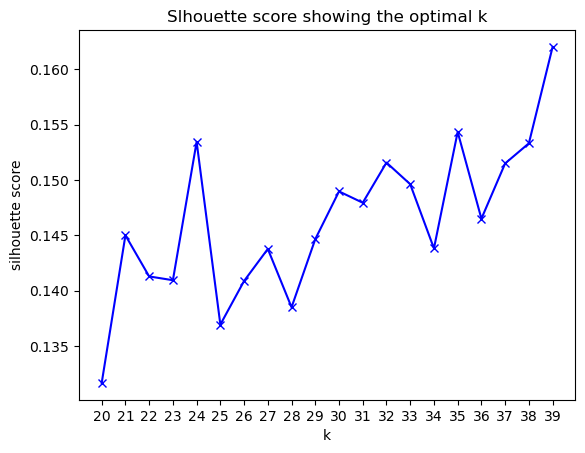

In [22]:
# Testing other Silhouette scores
from sklearn.metrics import silhouette_score
K = range(20, 40)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=1234)
    kmeans.fit(X)
    silhouette.append(silhouette_score(X, kmeans.predict(X)))

plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Slhouette score showing the optimal k')

In [ ]:
# Testing other Silhouette scores
from sklearn.metrics import silhouette_score
K = range(30, 60)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=1234)
    kmeans.fit(X)
    silhouette.append(silhouette_score(X, kmeans.predict(X)))

plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Slhouette score showing the optimal k')

In [22]:
#After analyze different Silhouette Score graphs I've decided to use 12

In [23]:
# Number of clusters = 12
kmeans = KMeans(n_clusters=12)
kmeans.fit(X)


KMeans(n_clusters=12)

In [24]:
# Predicting / assigning the clusters:
clusters = kmeans.predict(X)


In [25]:
# Size of the clusters
pd.Series(clusters).value_counts().sort_index()


0     17164
1     42192
2       162
3       649
4     23619
5        51
6      1215
7     32146
8     12169
9       152
10    36305
11     9657
dtype: int64

In [26]:
clusters


array([8, 7, 8, ..., 0, 0, 0], dtype=int32)

In [27]:
# Saving kmeans model
import pickle

with open('kmeans_model.pkl', 'wb') as f:
    pickle.dump(kmeans, f)


In [28]:
# Create a columns with the clusters
films_w_awards['cluster'] = kmeans.predict(X)

# Show the dataframe with the column 'cluster'
films_w_awards


,year_film,movie_name,runtime,rating,votes,osc_nominated_num,osc_won_num,cannes_won_num,director,actor1,...,osc_won_category11,osc_won_category12,cannes_won_category1,cannes_won_category2,cannes_won_category3,movie_id,director_id,star_id,description,cluster
0,1894,Miss Jerry,45,5.3,204,0,0,0,Alexander Black,Blanche Bayliss,...,NaN,NaN,NaN,NaN,NaN,tt0000009,/name/nm0085156/,"/name/nm0063086/,/name/nm0183823/,/name/nm1309...",The adventures of a female reporter in the 1890s.,8
1,1903,The Passion Play,45,6.5,575,0,0,0,Lucien Nonguet,Madame Moreau,...,NaN,NaN,NaN,NaN,NaN,tt0127962,/name/nm0634629/,"/name/nm0954087/,/name/nm1166468/,/name/nm1166...",The story of Jesus Christ from the proclamatio...,7
2,1905,La malia dell'oro,0,4.0,31,0,0,0,Filoteo Alberini,NaN,...,NaN,NaN,NaN,NaN,NaN,tt0388231,/name/nm1135106/,NaN,NaN,8
3,1905,Untitled Execution Films,0,NaN,0,0,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,tt11365068,NaN,NaN,The Japanese entered China in 1900 as part of ...,8
4,1906,The Story of the Kelly Gang,70,6.0,818,0,0,0,Charles Tait,Elizabeth Tait,...,NaN,NaN,NaN,NaN,NaN,tt0000574,/name/nm0846879/,"/name/nm0846887/,/name/nm0846894/,/name/nm1431...","Story of Ned Kelly, an infamous 19th-century A...",7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175476,2023,Dear Jassi,0,NaN,0,0,0,0,Tarsem Singh,Gulshan Grover,...,NaN,NaN,NaN,NaN,NaN,tt26542557,/name/nm0802248/,"/name/nm0004109/,/name/nm2747851/,/name/nm1015...",Plot under wraps.,0
175477,2023,Ant-Man and the Wasp: Quantumania,125,6.6,5396,0,0,0,Peyton Reed,Paul Rudd,...,NaN,NaN,NaN,NaN,NaN,tt10954600,/name/nm0715636/,"/name/nm0748620/,/name/nm1431940/,/name/nm3718...","Scott Lang and Hope Van Dyne, along with Hank ...",10
175478,2023,1919,0,NaN,0,0,0,0,Tomas Hoffman,Ondrej Vetchý,...,NaN,NaN,NaN,NaN,NaN,tt14446414,/name/nm1885989/,"/name/nm0895384/,/name/nm0889022/,/name/nm0389...",Adaptation of Frantisek Langer's play about co...,0
175479,2023,Bloody Nun,0,NaN,0,0,0,0,Will Collazo Jr.,Julie Anne Prescott,...,NaN,NaN,NaN,NaN,NaN,tt16537858,/name/nm4005028/,"/name/nm2766218/,/name/nm4908103/,/name/nm0470...",The final chapter in the Bloody Nun saga. Ther...,0


In [29]:
films_w_awards

,year_film,movie_name,runtime,rating,votes,osc_nominated_num,osc_won_num,cannes_won_num,director,actor1,...,osc_won_category11,osc_won_category12,cannes_won_category1,cannes_won_category2,cannes_won_category3,movie_id,director_id,star_id,description,cluster
0,1894,Miss Jerry,45,5.3,204,0,0,0,Alexander Black,Blanche Bayliss,...,NaN,NaN,NaN,NaN,NaN,tt0000009,/name/nm0085156/,"/name/nm0063086/,/name/nm0183823/,/name/nm1309...",The adventures of a female reporter in the 1890s.,8
1,1903,The Passion Play,45,6.5,575,0,0,0,Lucien Nonguet,Madame Moreau,...,NaN,NaN,NaN,NaN,NaN,tt0127962,/name/nm0634629/,"/name/nm0954087/,/name/nm1166468/,/name/nm1166...",The story of Jesus Christ from the proclamatio...,7
2,1905,La malia dell'oro,0,4.0,31,0,0,0,Filoteo Alberini,NaN,...,NaN,NaN,NaN,NaN,NaN,tt0388231,/name/nm1135106/,NaN,NaN,8
3,1905,Untitled Execution Films,0,NaN,0,0,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,tt11365068,NaN,NaN,The Japanese entered China in 1900 as part of ...,8
4,1906,The Story of the Kelly Gang,70,6.0,818,0,0,0,Charles Tait,Elizabeth Tait,...,NaN,NaN,NaN,NaN,NaN,tt0000574,/name/nm0846879/,"/name/nm0846887/,/name/nm0846894/,/name/nm1431...","Story of Ned Kelly, an infamous 19th-century A...",7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175476,2023,Dear Jassi,0,NaN,0,0,0,0,Tarsem Singh,Gulshan Grover,...,NaN,NaN,NaN,NaN,NaN,tt26542557,/name/nm0802248/,"/name/nm0004109/,/name/nm2747851/,/name/nm1015...",Plot under wraps.,0
175477,2023,Ant-Man and the Wasp: Quantumania,125,6.6,5396,0,0,0,Peyton Reed,Paul Rudd,...,NaN,NaN,NaN,NaN,NaN,tt10954600,/name/nm0715636/,"/name/nm0748620/,/name/nm1431940/,/name/nm3718...","Scott Lang and Hope Van Dyne, along with Hank ...",10
175478,2023,1919,0,NaN,0,0,0,0,Tomas Hoffman,Ondrej Vetchý,...,NaN,NaN,NaN,NaN,NaN,tt14446414,/name/nm1885989/,"/name/nm0895384/,/name/nm0889022/,/name/nm0389...",Adaptation of Frantisek Langer's play about co...,0
175479,2023,Bloody Nun,0,NaN,0,0,0,0,Will Collazo Jr.,Julie Anne Prescott,...,NaN,NaN,NaN,NaN,NaN,tt16537858,/name/nm4005028/,"/name/nm2766218/,/name/nm4908103/,/name/nm0470...",The final chapter in the Bloody Nun saga. Ther...,0


In [30]:
films_w_awards.to_csv('films_w_awards_cluster.csv', index=False)
